In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

def calibrate_camera(img_dir, img_ext,img_r_c):
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    
    print("starting image search..:")
    
    x,y = 0,0
    
    for id_val in range(0,20,1):
        fname = img_dir+"calibration"+str(id_val+1)+"."+img_ext
        img = cv2.imread(fname)
        row,col = img_r_c[id_val][0],img_r_c[id_val][1]
        print(fname, (row,col))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        y,x = gray.shape[0],gray.shape[1]
        
        objp = np.zeros((row*col,3), np.float32)
        objp[:,:2] = np.mgrid[0:row,0:col].T.reshape(-1,2)
    
        
        
        ret, corners = cv2.findChessboardCorners(gray, (row,col),None)
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            img = cv2.drawChessboardCorners(img, (row,col), corners,ret)
            print("corner found: "+fname)
        else:
            print("no corner: "+fname)

    return cv2.calibrateCamera(objpoints, imgpoints, (x,y),None,None)

print("calibration function ready..")

img_r_c = np.full((20,2),(9,6))
img_r_c[0] = (9,5)
img_r_c[3] = (6,5)
img_r_c[4] = (7,5)


#print(img_r_c)
ret, mtx, dist, rvecs, tvecs = calibrate_camera("./camera_cal/","jpg",img_r_c)

print("-------calibration done--------------")

save_path = "./camera_calibrate.p"

calibration = {'ret': ret,
               'mtx': mtx,
               'dist': dist,
               'rvecs': rvecs,
               'tvecs': tvecs}

with open(save_path, 'wb') as f:
    pickle.dump(calibration, file=f)
    
print('-------pickled calibration parameters---------')   

calibration function ready..
starting image search..:
./camera_cal/calibration1.jpg (9, 5)
corner found: ./camera_cal/calibration1.jpg
./camera_cal/calibration2.jpg (9, 6)
corner found: ./camera_cal/calibration2.jpg
./camera_cal/calibration3.jpg (9, 6)
corner found: ./camera_cal/calibration3.jpg
./camera_cal/calibration4.jpg (6, 5)
corner found: ./camera_cal/calibration4.jpg
./camera_cal/calibration5.jpg (7, 5)
corner found: ./camera_cal/calibration5.jpg
./camera_cal/calibration6.jpg (9, 6)
corner found: ./camera_cal/calibration6.jpg
./camera_cal/calibration7.jpg (9, 6)
corner found: ./camera_cal/calibration7.jpg
./camera_cal/calibration8.jpg (9, 6)
corner found: ./camera_cal/calibration8.jpg
./camera_cal/calibration9.jpg (9, 6)
corner found: ./camera_cal/calibration9.jpg
./camera_cal/calibration10.jpg (9, 6)
corner found: ./camera_cal/calibration10.jpg
./camera_cal/calibration11.jpg (9, 6)
corner found: ./camera_cal/calibration11.jpg
./camera_cal/calibration12.jpg (9, 6)
corner found:

found corner
done 


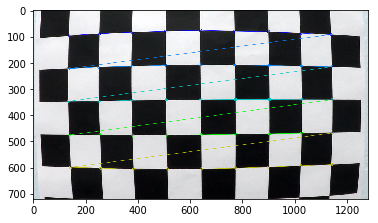

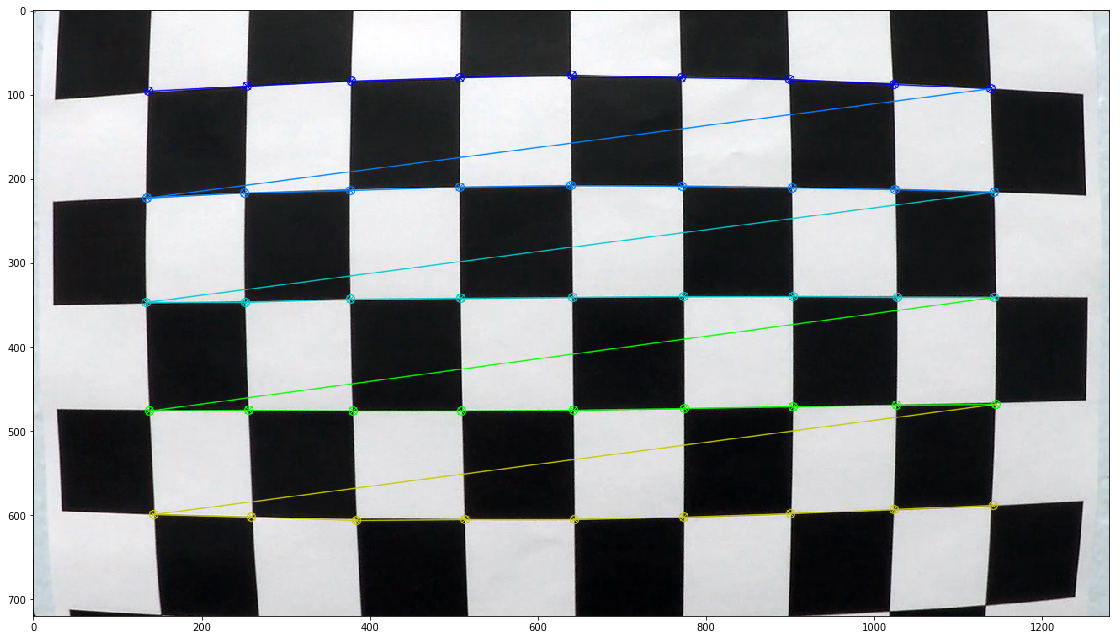

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = './camera_cal/calibration1.jpg'
img = cv2.imread(fname)



plt.imshow(img)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny),  None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    print("found corner")
    plt.imshow(img)
    f5, (ax5) = plt.subplots(1, 1, figsize=(24, 9))
    f5.tight_layout()
    ax5.imshow(img)
    f5.savefig("./output_images/calibrate_1.jpg")

print("done ")